In [22]:
# pandas is a library for storing and working with structured data
import pandas as pd
# numpy is a library for storing and working with matrices, similar to pandas but has more low level and maths fuctions
import numpy as np

In [5]:
# read in the csv file as a dataframe
df = pd.read_csv('data/DiMuon_SingleMu_noM.csv', low_memory=False)

In [6]:
# show the first 5 lines of the dataframe
df.head(n=5)

,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,pz1,type2,Q2,pt2,eta2,phi2,E2,px2,py2,pz2
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,19.4881,T,-1,1.2556,2.2683,-1.4488,6.1319,0.1528,-1.2463,6.0011
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,-7.9199,G,1,19.5453,-1.0826,-0.3408,32.1613,18.4210,-6.5332,-25.5406
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,49.7791,T,-1,2.3864,1.5352,-1.7388,5.7968,-0.3991,-2.3528,5.2818
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,46.2199,G,-1,1.8721,1.9704,1.6393,6.8459,-0.1281,1.8678,6.5841
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,11.6479,T,1,0.9408,2.0107,-1.6559,3.5779,-0.0799,-0.9374,3.4504


0        2.2366
1       -2.0159
2        1.5948
3        1.6422
4        0.8711
          ...  
83756    2.3706
83757    2.2307
83758   -0.2433
83759   -1.1897
83760    0.3614
Name: eta1, Length: 83761, dtype: float64
count    83761.000000
mean        -0.026259
std          1.587705
min         -2.399900
25%         -1.545200
50%         -0.054900
75%          1.497500
max          2.400000
Name: eta1, dtype: float64


<Axes: >

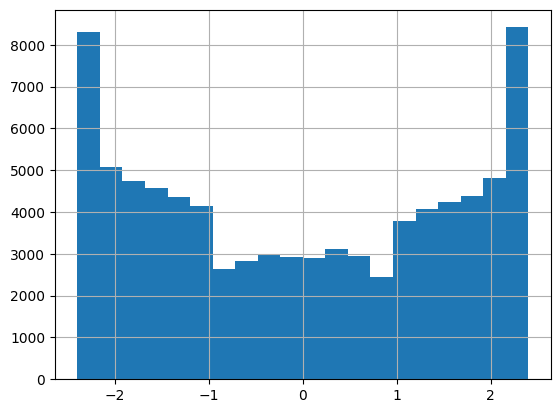

In [16]:
# access the values in a single variable
print(df['eta1'])

# get some basic stats for that variable
df['eta1'].describe()

# note: print statements are only needed for things you want to show that are not the final command in your cell as that prints by default

<Axes: >

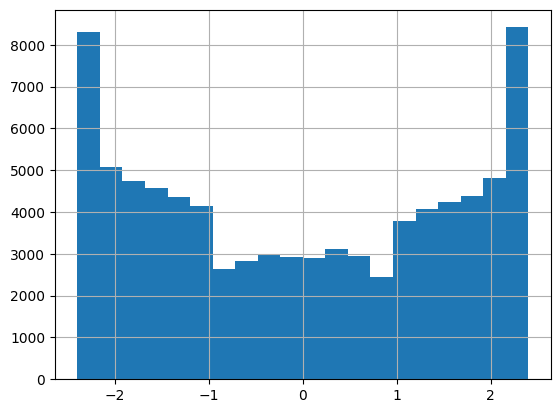

In [29]:
# plot a histogram for that variable
df['eta1'].hist(bins=20)

In [53]:
# you can make new variables by using equations and functions and assigning them a name
df['sum_E1_E2'] = df['E1'] + df['E2']
df['log_E1'] = np.log(df['E1']) # log(base e)
df['sqrt_E1'] = np.sqrt(df['E1']) # square root
df['pwr.1_E1'] = df['E1'] ** .1 # raised to the power of 1/10

# Check the dataframe again to check they're there and look right
df.head()

,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,...,px2,py2,pz2,log_E1,sum_E1_E2,log_E2,log_pt1,log_pt2,sqrt_E1,pwr.1_E1
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,...,0.1528,-1.2463,6.0011,2.992637,26.0701,1.813505,1.437843,0.227614,4.465221,1.348865
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,...,18.4210,-6.5332,-25.5406,2.104939,40.3679,3.470764,0.764491,2.972735,2.864716,1.234287
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,...,-0.3991,-2.3528,5.2818,3.990021,59.8528,1.757306,3.048002,0.869786,7.352279,1.490337
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,...,-0.1281,1.8678,6.5841,3.908376,56.6639,1.923650,2.922565,0.627061,7.058187,1.478218
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,...,-0.0799,-0.9374,3.4504,2.809083,20.1726,1.274776,2.469742,-0.061025,4.073659,1.324332


<Axes: >

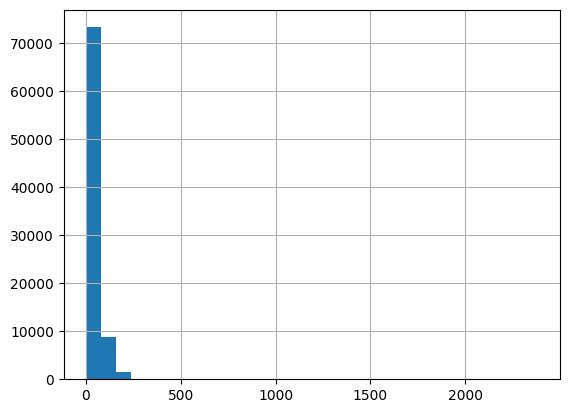

In [59]:
# plot the histogram for E1 and see how it's very skewed to the left
df['E1'].hist(bins=30)

<Axes: >

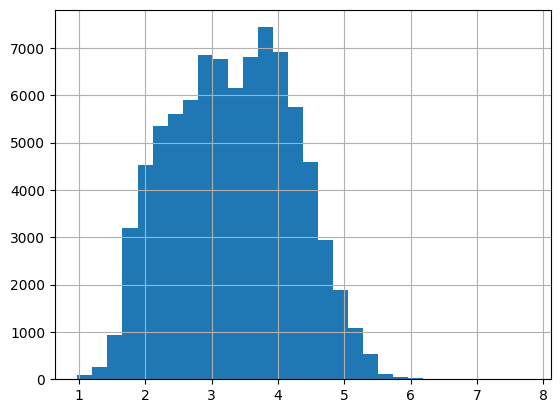

In [60]:
# A common way to make it account for severe right skew like this is to use the log-transformed version of the variable
# This allows to see distributions and anomalies a lot more clearly
# The bins argument indicates how many columns we want - low values show the overall shape better while high values show anomalies better
df['log_E1'].hist(bins=30)

<Axes: xlabel='E1', ylabel='pt1'>

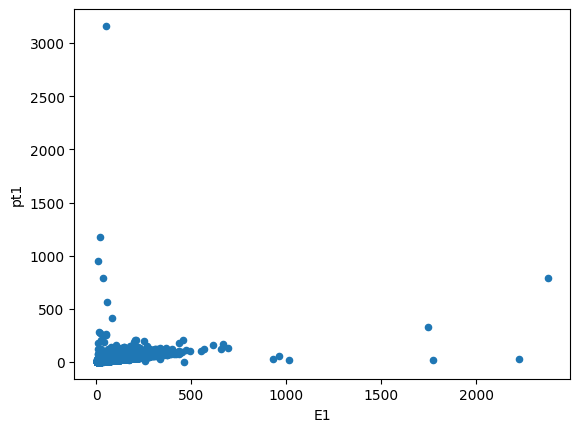

In [47]:
# Plot a scatterplot of E1 and E2
df.plot.scatter('E1', 'pt1')
# We'll have the same issue when we do scatterplots with highly skewed variables

<Axes: xlabel='log_pt1', ylabel='log_E1'>

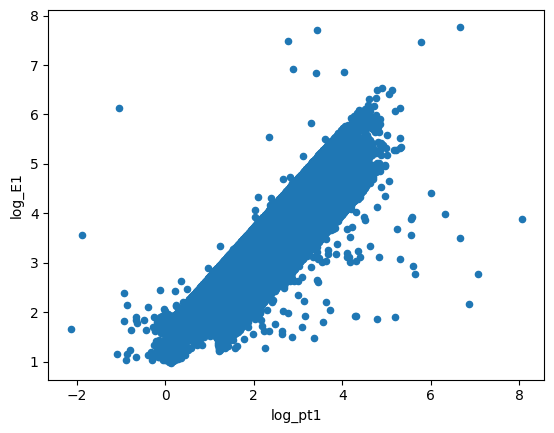

In [48]:
# log-transform the transverse momentum, then do the scatterplot
df['log_pt1'] = np.log(df['pt1'])
df.plot.scatter('log_pt1', 'log_E1')
# Clearly a positive, linear relationship between transverse momentum and energy for the first particle

<Axes: xlabel='log_pt2', ylabel='log_E2'>

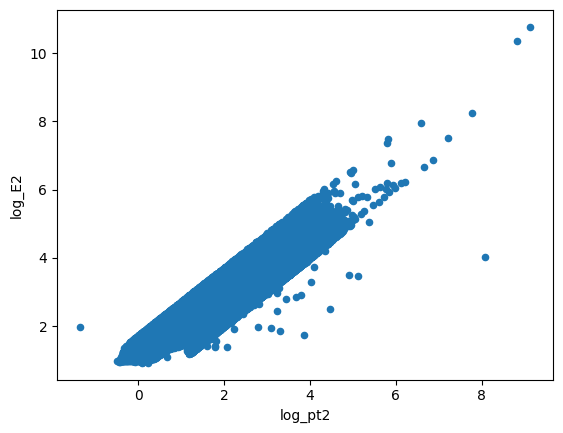

In [63]:
# Do the same for the second particle
df['log_pt2'] = np.log(df['pt2'])
df['log_E2'] = np.log(df['E2'])
df.plot.scatter('log_pt2', 'log_E2')